### Importing libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [47]:
sales = pd.read_csv('supermarket_sales - Sheet1.csv')

In [48]:
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


### Problem Statement

This is a supermarket sales data, the supermarket has 3 different branches in 3 different cities. We got to get deeper insights of quantity sold, income generated and more. In this sales data, also we can have a look on sales of different category of products purchased on different days and time of days. This is a data of 3 months in the year 2019.

### Data Dictionary

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Data Exploration and Cleaning

In [49]:
sales.shape

(1000, 17)

In [50]:
sales.keys()

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [51]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [52]:
sales.set_index('Invoice ID', inplace=True) # index changed to Date

In [53]:
sales

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7


In [54]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income

In [55]:
sales['Date'] # Here we have Date and Time as a object,changing their dtype to date and time

Invoice ID
750-67-8428     1/5/2019
226-31-3081     3/8/2019
631-41-3108     3/3/2019
123-19-1176    1/27/2019
373-73-7910     2/8/2019
                 ...    
233-67-5758    1/29/2019
303-96-2227     3/2/2019
727-02-1313     2/9/2019
347-56-2442    2/22/2019
849-09-3807    2/18/2019
Name: Date, Length: 1000, dtype: object

In [58]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [59]:
sales['Time'] = pd.to_datetime(sales['Time'])

#### Adding day, month, year and hour column

In [60]:
sales['Day'] = (sales['Date']).dt.day
sales['Month'] = (sales['Date']).dt.month
sales['Year'] = (sales['Date']).dt.year
sales['Hour'] = (sales['Time']).dt.hour 

In [61]:
sales['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

In [62]:
sales['Month'].unique()

array([1, 3, 2], dtype=int64)

In [63]:
sales['Year'].unique()

array([2019], dtype=int64)

In [64]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   object        
 1   City                     1000 non-null   object        
 2   Customer type            1000 non-null   object        
 3   Gender                   1000 non-null   object        
 4   Product line             1000 non-null   object        
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Total                    1000 non-null   float64       
 9   Date                     1000 non-null   datetime64[ns]
 10  Time                     1000 non-null   datetime64[ns]
 11  Payment                  1000 non-null   object        
 12  cogs                  

In [65]:
sales.isnull().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day                        0
Month                      0
Year                       0
Hour                       0
dtype: int64

#### Statistical data

In [66]:
sales.describe() #Statistical summary

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


We can see that the mean and median does not have much difference, therefore either there is minimum outliers or the values are balanced on both positive and negative side.

In [67]:
sales.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,0.057021,-0.027387,NaN,0.008242
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,-0.043347,-0.014524,NaN,-0.007317
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.007076,-0.042880,NaN,-0.030588
Day,0.057021,-0.043347,-0.002515,-0.002515,-0.002515,NaN,-0.002515,-0.007076,1.000000,-0.118996,NaN,0.020668
Month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,NaN,-0.022301,-0.042880,-0.118996,1.000000,NaN,0.043762


In [68]:
sales_corr = np.round(sales.corr(),2)

In [69]:
sales_corr

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01,0.06,-0.03,NaN,0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02,-0.04,-0.01,NaN,-0.01
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00,-0.01,-0.04,NaN,-0.03
Day,0.06,-0.04,-0.00,-0.00,-0.00,NaN,-0.00,-0.01,1.00,-0.12,NaN,0.02
Month,-0.03,-0.01,-0.02,-0.02,-0.02,NaN,-0.02,-0.04,-0.12,1.00,NaN,0.04


### Exploratory Data Analysis

#### Plotting correlation between columns

<AxesSubplot:>

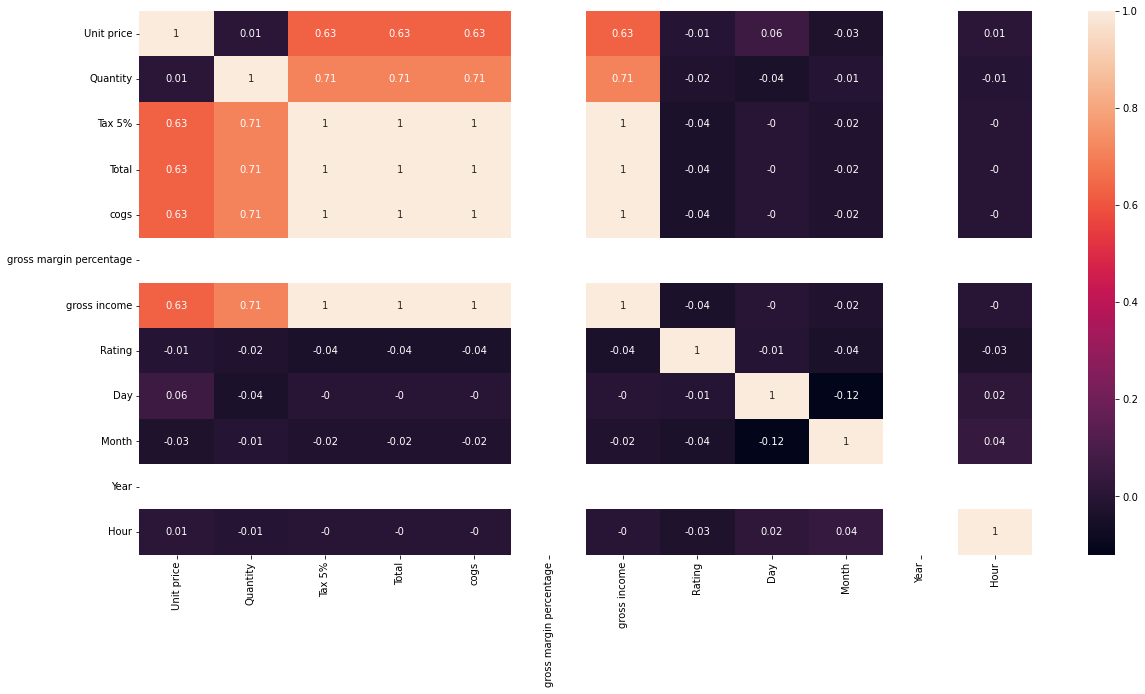

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(sales_corr, annot=True)

The highest correlation which we can draw from above heatmap is between Quantity and Tax, Quantity and Total Sales, Quantity and Cogs, Quantity and Gross Income.
The correlation is 0.71 in each of the above.

#### Lets plot the sales per hour

Text(0, 0.5, 'Quantity')

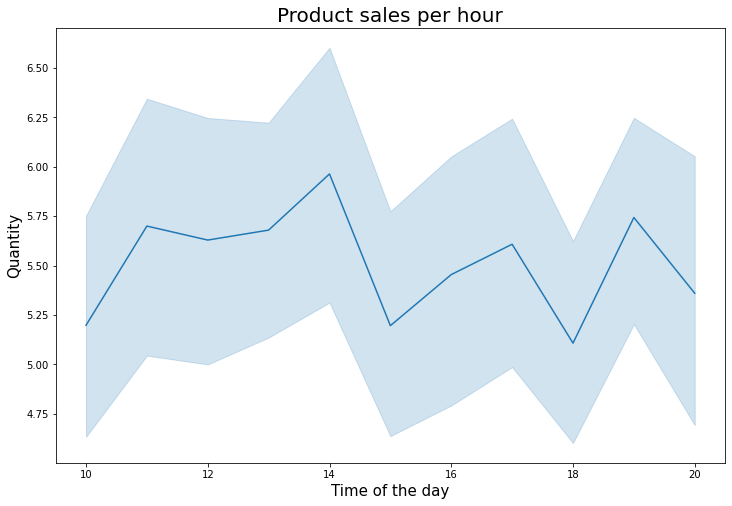

In [71]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Hour',y='Quantity',data=sales)
plt.title('Product sales per hour', fontsize=20)
plt.xlabel('Time of the day', fontsize=15)
plt.ylabel('Quantity', fontsize=15)

We can see that the sales is highest at 2pm.
Good volume of sales is recorded around 5pm and 7pm.
The sales is recorded to be the lowest around 10pm, 3pm and 4pm.

Text(0, 0.5, 'Quantity')

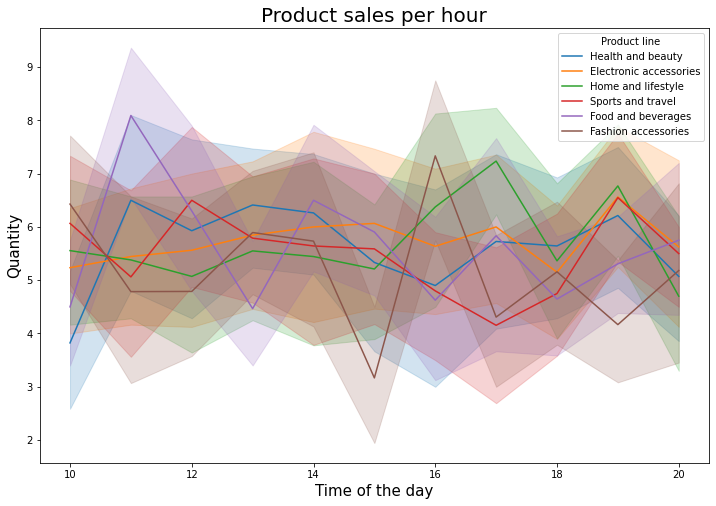

In [72]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Hour',y='Quantity',data=sales, hue='Product line')
plt.title('Product sales per hour', fontsize=20)
plt.xlabel('Time of the day', fontsize=15)
plt.ylabel('Quantity', fontsize=15)

Health and Beauty products has no specific time of purchase
Electronic sales are seen around 7 pm which is the end of daily work, when family can enjoy such shopping.
Home and lifestyle is recorded around 5 pm and 7 pm which can be an ideal time for homemakers to make such purchases.
Food and beverages are seen to be purchased more at 11 am which is an ideal time to purchase daily or weekly food items.
Fashion accessories are seen to be purchased at 4 pm which can be an ideal time not only for adults but also for teenagers.

#### Plotting sales per day

Text(0, 0.5, 'Quantity')

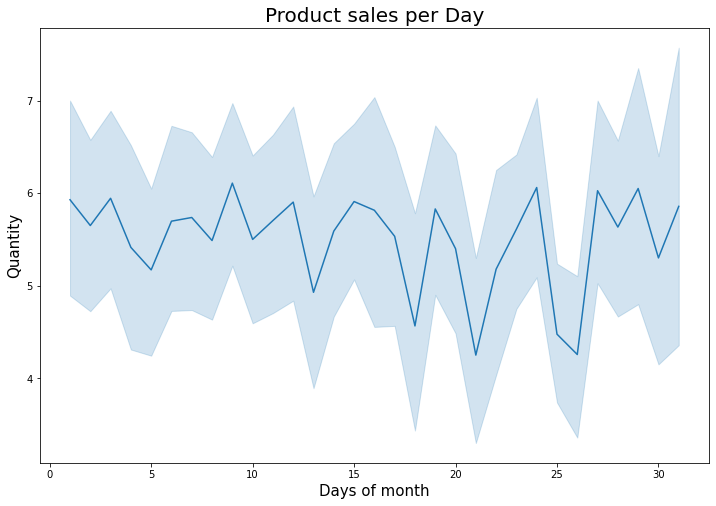

In [73]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Day',y='Quantity',data=sales,)
plt.title('Product sales per Day',fontsize=20)
plt.xlabel('Days of month',fontsize=15)
plt.ylabel('Quantity',fontsize=15)

On an average we can see that the sales of products per day is unevenly distributed. There cannot be any pattern drawn.

#### Lets try for month wise

Text(0, 0.5, 'Quantity')

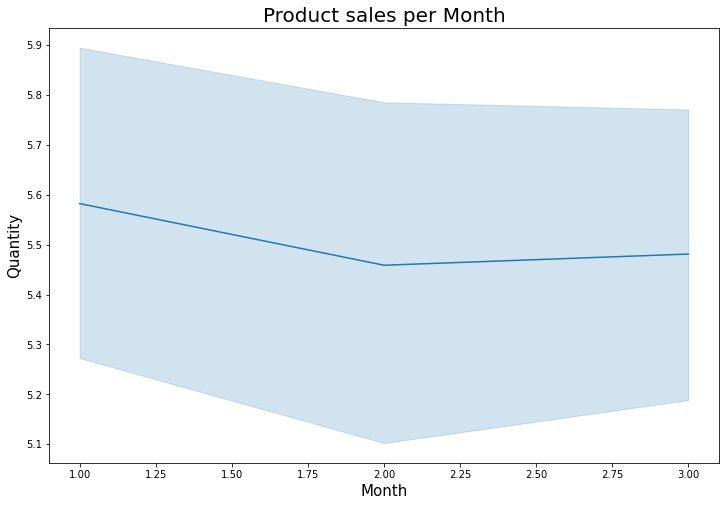

In [27]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Month',y='Quantity',data=sales)
plt.title('Product sales per Month',fontsize=20)
plt.xlabel('Month',fontsize=15)
plt.ylabel('Quantity',fontsize=15)

We can see that in 2019, the sales in all the 3 months remained almost same

Text(0, 0.5, 'Gross Income')

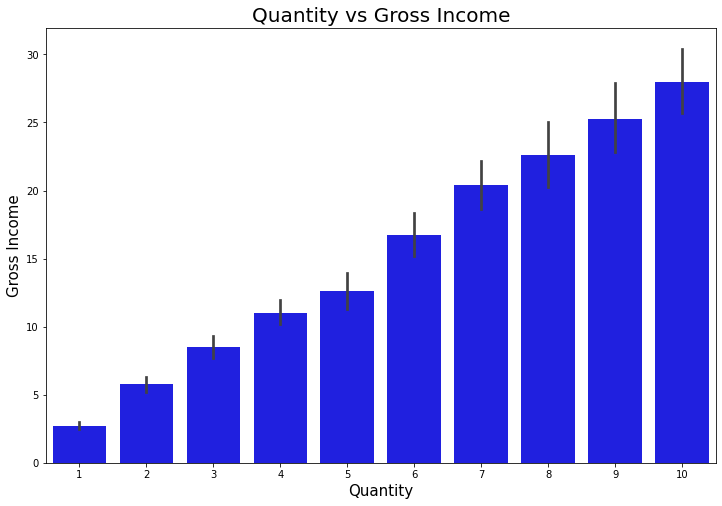

In [28]:
plt.figure(figsize = (12,8))
ax = sns.barplot(x="Quantity", y= "gross income", data = sales, color='blue')
ax.set_title(label = "Quantity vs Gross Income", fontsize= 20)
ax.set_xlabel(xlabel = "Quantity", fontsize = 15)
ax.set_ylabel(ylabel = "Gross Income", fontsize = 15)

We can clearly see that as the Quantity increases so does the gross income.

Text(0, 0.5, 'Tax')

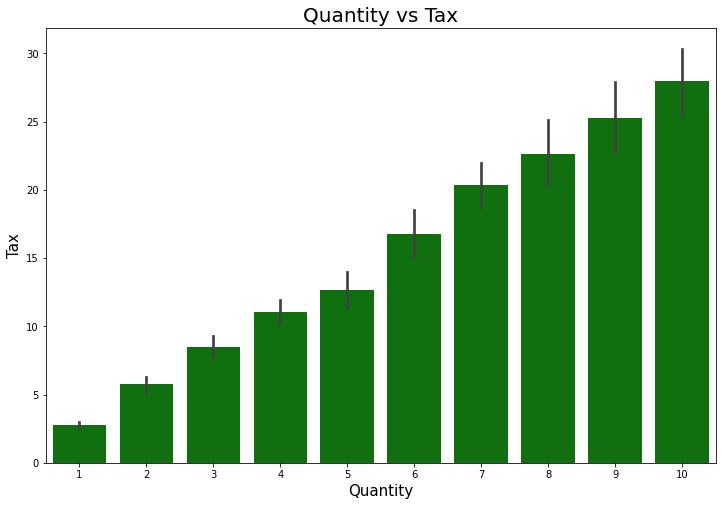

In [29]:
plt.figure(figsize = (12,8))
ax = sns.barplot(x="Quantity", y = "Tax 5%", data = sales, color='green')
ax.set_title(label = "Quantity vs Tax", fontsize= 20)
ax.set_xlabel(xlabel = "Quantity", fontsize = 15)
ax.set_ylabel(ylabel = "Tax", fontsize = 15)

Tax on products received increases with the increase in quantity sold.

Text(0, 0.5, 'Cost of goods sold')

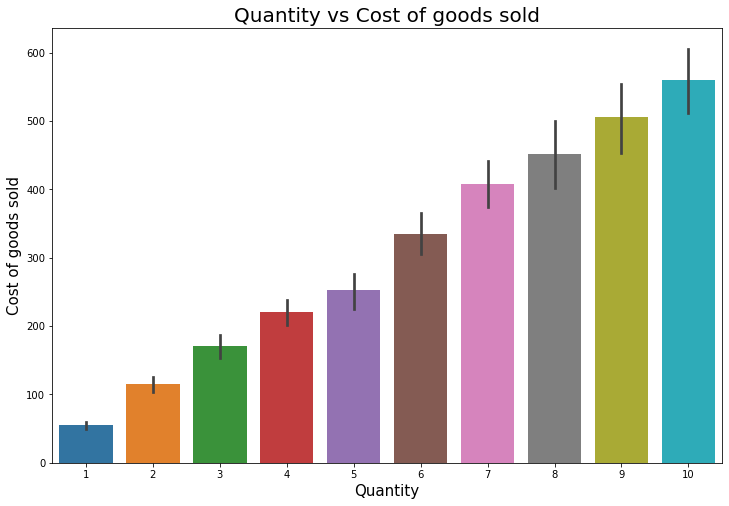

In [30]:
plt.figure(figsize = (12,8))
ax = sns.barplot(x="Quantity", y="cogs", data = sales)
ax.set_title(label = "Quantity vs Cost of goods sold", fontsize= 20)
ax.set_xlabel(xlabel = "Quantity", fontsize = 15)
ax.set_ylabel(ylabel = "Cost of goods sold", fontsize = 15)

As the Quantity is increasing, the cost of good sold also increases.

Lets see the distribution for different columns depending upon their row values. 

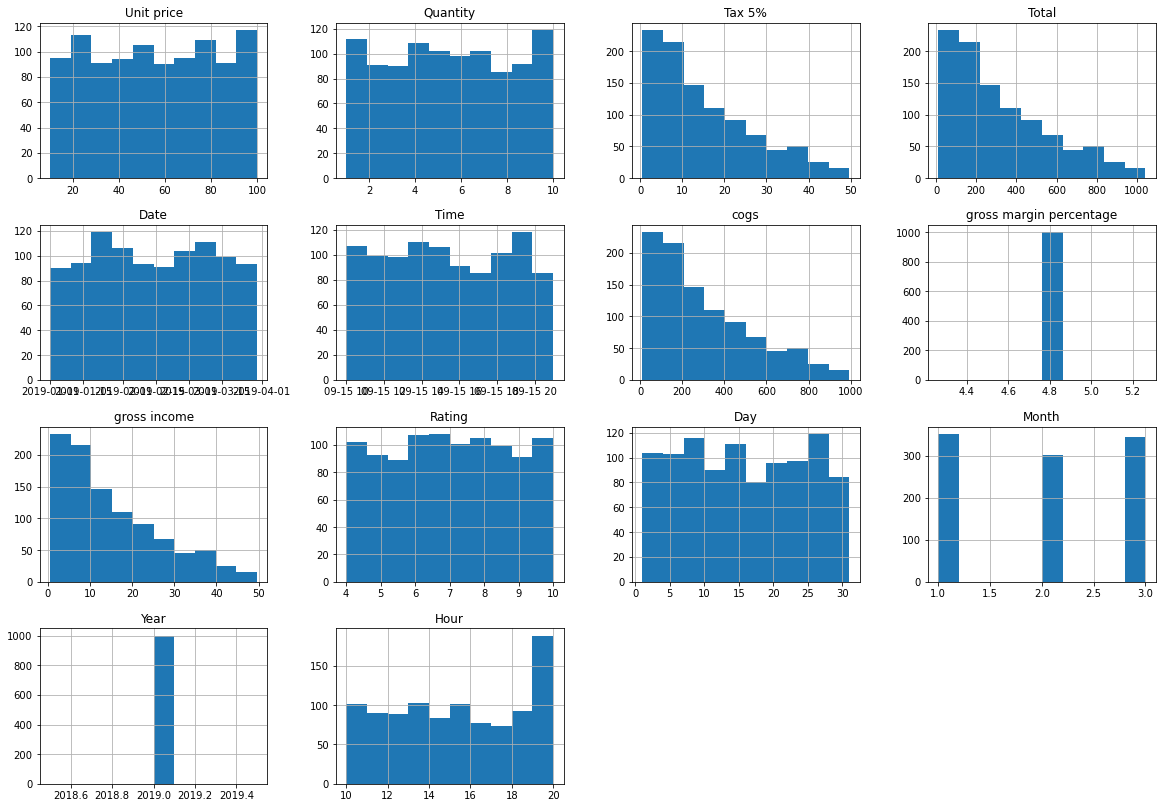

In [31]:
sales.hist(figsize=(20,14))
plt.show()

### Analysis of Branch, City and Product type

Text(0, 0.5, 'Quantity')

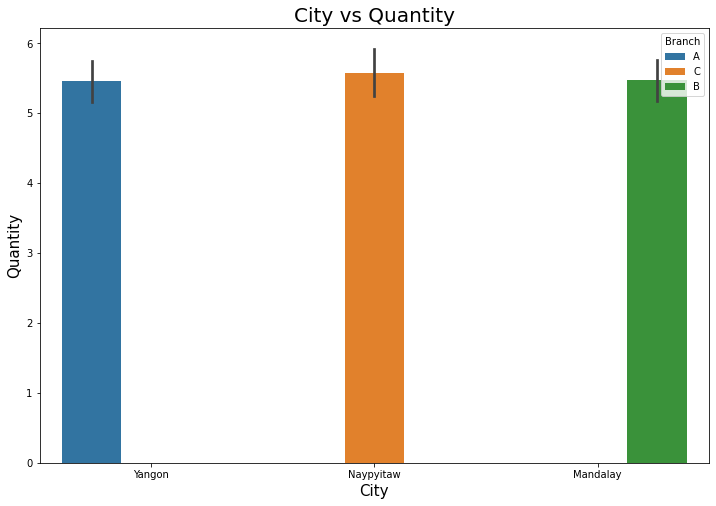

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(x='City', y='Quantity',hue='Branch',data=sales)
plt.title('City vs Quantity', fontsize=20)
plt.xlabel('City',fontsize=15)
plt.ylabel('Quantity',fontsize=15)

We can see that there is not much difference is sales in all the 3 cities, one branch each is situated in all 3 cities.

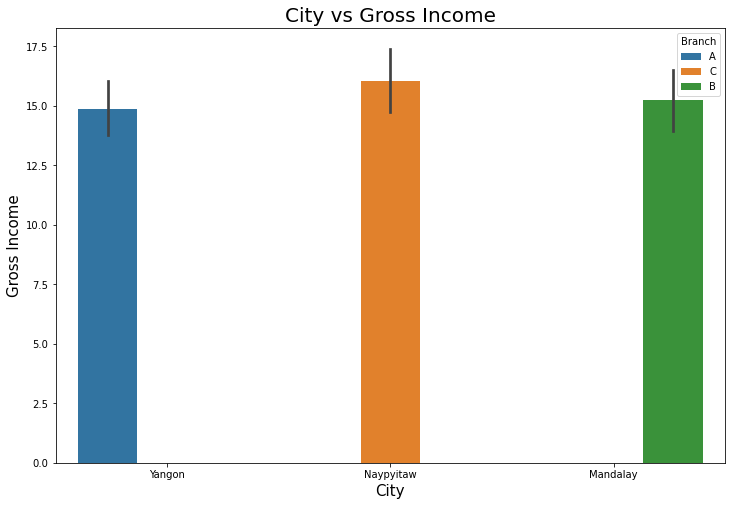

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(x='City',y='gross income',hue='Branch',data=sales)
plt.title('City vs Gross Income', fontsize=20)
plt.xlabel('City',fontsize=15)
plt.ylabel('Gross Income',fontsize=15)

plt.show()


We can see the split of total gross income across cities in all 3 branches. We can see an even distribution.

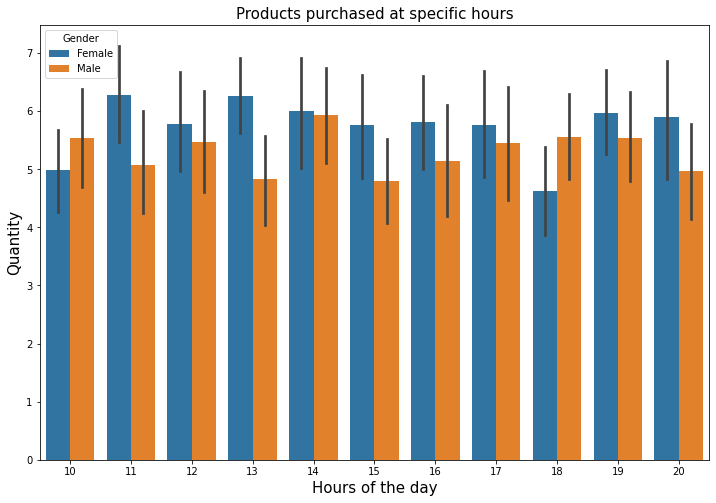

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(x='Hour', y='Quantity',hue='Gender',data=sales)
plt.title('Products purchased at specific hours', fontsize=15)
plt.xlabel('Hours of the day',fontsize=15)
plt.ylabel('Quantity',fontsize=15)
plt.show()


We can see that 11 am to 1 pm, major purchases are by females. Only at 2 pm it is equal and at 6 pm the purchases are more by males.

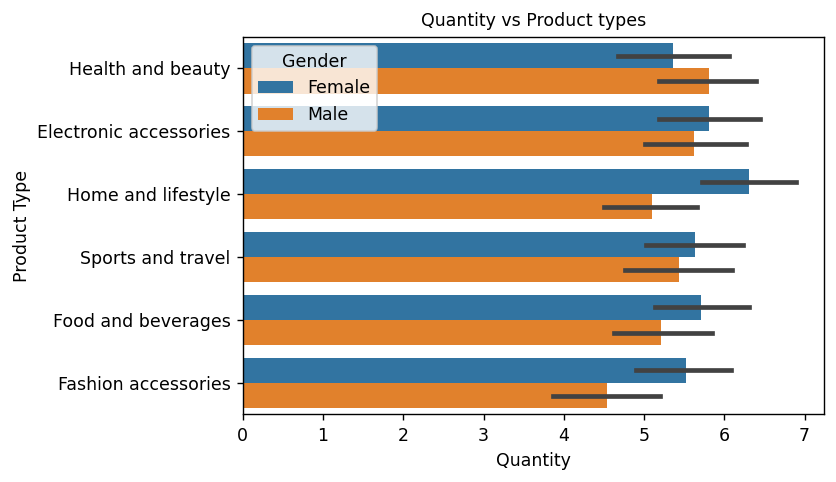

In [35]:
plt.figure(dpi=125)
ax = sns.barplot(x='Quantity',y ='Product line', hue = "Gender", data = sales) 
ax.set_title('Quantity vs Product types',fontsize=10)
ax.set_xlabel('Quantity',fontsize=10)
ax.set_ylabel('Product Type',fontsize=10)
plt.show()

In health and beauty there are more male customers making the purchases compared to females and in Fashion accessories its the opposite.
The most sales is recorded in Home and lifestyle done by females.

### Customer & Branches

In [36]:
sales.groupby(['Customer type']).agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


Text(0, 0.5, 'Quantity')

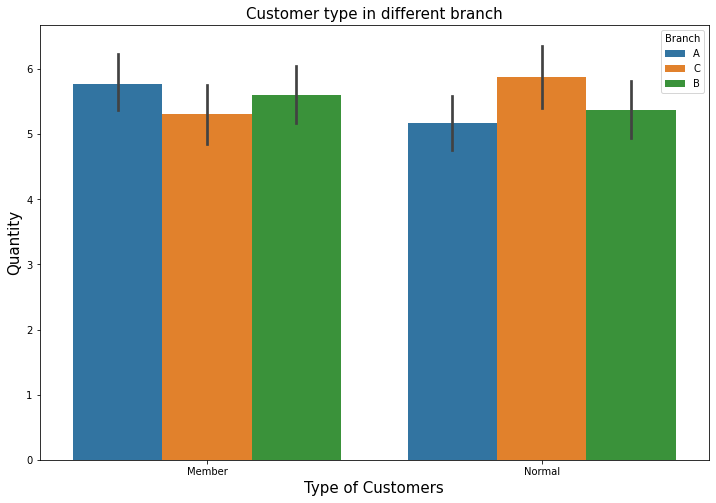

In [37]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x = "Customer type", y="Quantity", hue = "Branch", data = sales)
ax.set_title(label = "Customer type in different branch", fontsize = 15)
ax.set_xlabel(xlabel = "Type of Customers", fontsize = 15)
ax.set_ylabel(ylabel = "Quantity", fontsize = 15)

In branch A member customers make more purchases and normal customers in branch C.
In branch B, equal purchases are made by member and normal customers.

Text(0, 0.5, 'Quantity')

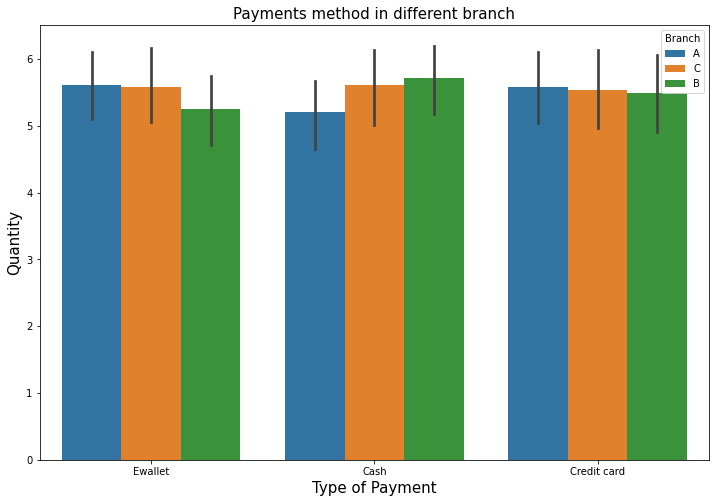

In [38]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x = "Payment", y="Quantity", hue = "Branch", data = sales)
ax.set_title(label = "Payments method in different branch", fontsize = 15)
ax.set_xlabel(xlabel = "Type of Payment", fontsize = 15)
ax.set_ylabel(ylabel = "Quantity", fontsize = 15)

Ewallet is used equally in branch A and C, credit card is used equally in all 3 branches, cash is used less in branch A and Ewallet is used less in branch B.

Text(0, 0.5, 'Product line')

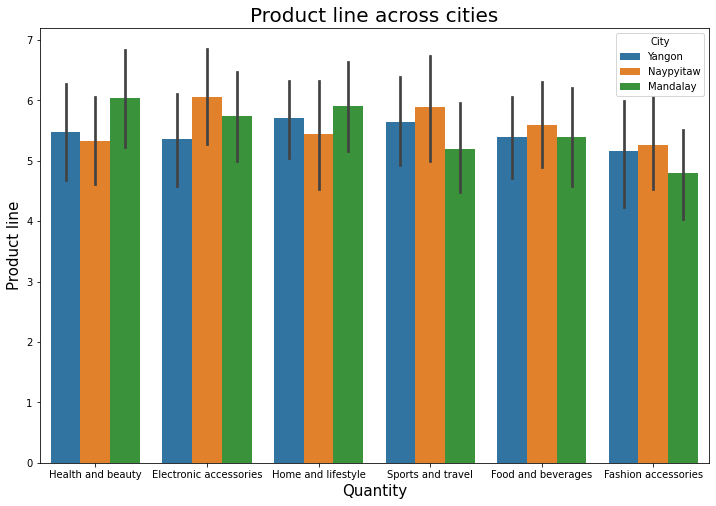

In [39]:
plt.figure(figsize = (12,8))
ax = sns.barplot(y="Quantity",x="Product line", hue = "City", data = sales)
ax.set_title(label = "Product line across cities", fontsize= 20)
ax.set_xlabel(xlabel = "Quantity", fontsize = 15)
ax.set_ylabel(ylabel = "Product line", fontsize = 15)

Health and beauty products are purchased more in Mandalay.
The consumption of Electronic accessories is the highest in Naypyitaw.
The consumption of Home and lifestyle products and food and beverages is evenly distributed in all 3 cities.
Fashion accessories has got very low sales.

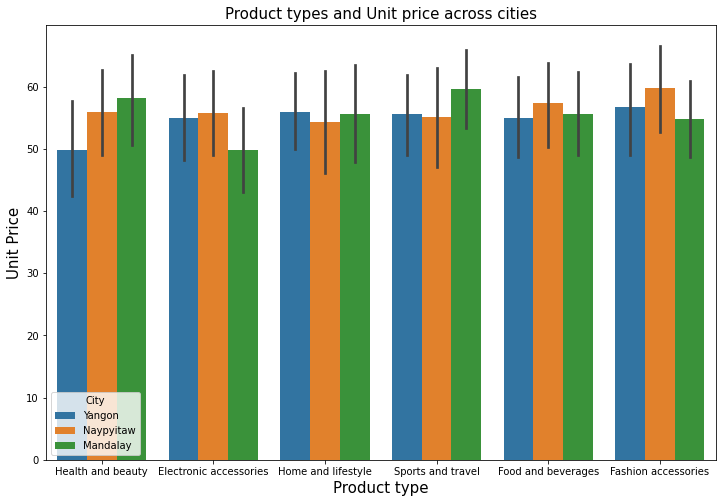

In [40]:
plt.figure(figsize = (12,8))
sns.barplot(x='Product line',y='Unit price',hue='City',data=sales)
plt.title('Product types and Unit price across cities',fontsize=15)
plt.xlabel('Product type',fontsize=15)
plt.ylabel('Unit Price',fontsize=15)
plt.show()

The unit prices of all product types is similar across all 3 cities in the range of 55-60.
Health and beauty in Yangon and Electronics in Mandalay has lower unit prices in the range of 45-50.

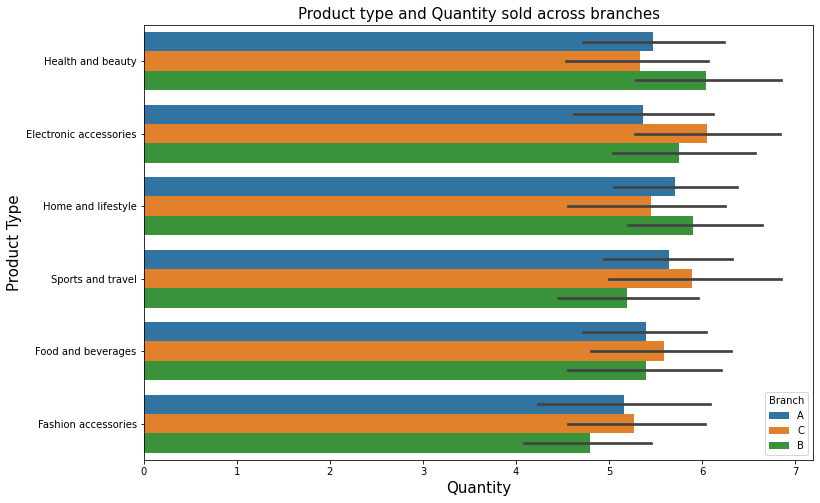

In [41]:
plt.figure(figsize=(12,8))
sns.barplot(x='Quantity',y='Product line',hue='Branch',data=sales)
plt.title('Product type and Quantity sold across branches',fontsize=15)
plt.xlabel('Quantity',fontsize=15)
plt.ylabel('Product Type',fontsize=15)
plt.show()

Branch B leads in the sales of Health and beauty but lowest purchases of Fashion Accessories.
Branch C leads in Electronic Accessories and Sports and travel, it has got fair volume of all categories.

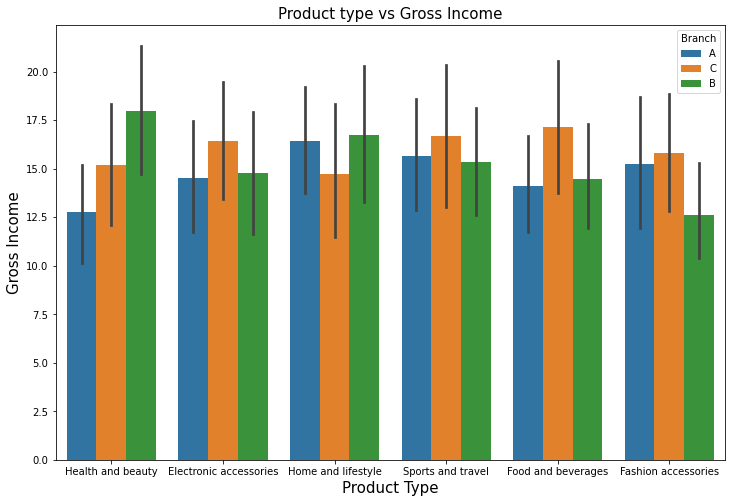

In [42]:
plt.figure(figsize=(12,8))
sns.barplot(x='Product line',y='gross income',hue='Branch',data=sales)
plt.title('Product type vs Gross Income',fontsize= 15)
plt.xlabel('Product Type',fontsize=15)
plt.ylabel('Gross Income',fontsize=15)
plt.show()

The highest gross income is recorded in Branch B for health and beauty.
The lowest income is for branch A in health and beauty and branch B in Fashion accessories.
The gross income in Branch C is similar for all product category.

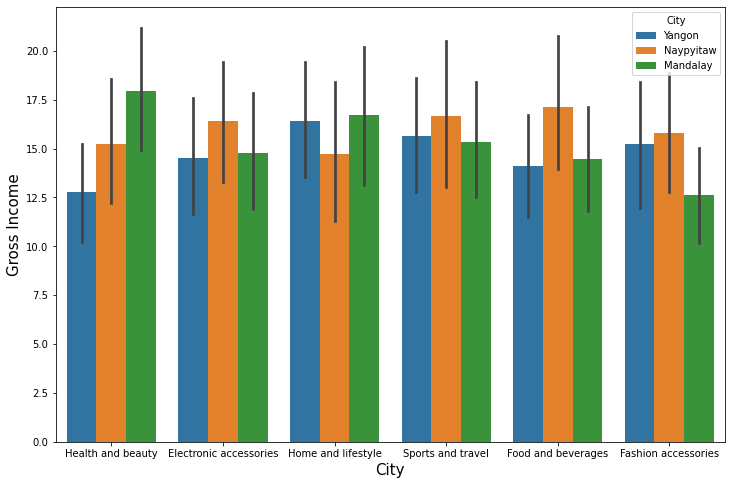

In [43]:
plt.figure(figsize=(12,8))
sns.barplot(x='Product line',y='gross income',hue='City',data=sales)
plt.xlabel('City',fontsize=15)
plt.ylabel('Gross Income',fontsize=15)
plt.show()

Health and beauty records the highest gross income in Mandalay and lowest in Yangon.
The lowest income amongst the product lines is recorded for Fashion accessories in Mandalay and Health and beauty in Yangon.
The income for rest of the categories in the 3 cities seems to be evenly distributed.

### Conclusion

1. The sales of products in the supermarket depends highly on the time of day viz. low sales at opening time and high sales in evening.

2. If the sales is considered on daily and monthly basis, it is evenly distributed.

3. The gross income of all the supermarkets in each of the 3 cities is more or less the same.

### Insights

1. The highest correlation is 0.71 between Quantity and Tax, Quantity and Total Sales, Quantity and Cogs, Quantity and Gross Income.

2. The sales is highest at 2pm and good volume of sales is recorded around 5pm and 7pm.

3. The sales is recorded to be the lowest around 10pm, 3pm and 4pm.

4. Each of the 3 cities Yangon, Naypyitaw, Mandalay has got 1 branch each A, B and C with similar Gross Income.

5. The most sales is recorded in Home and lifestyle segment made by females.

6. In Branch A 'member customers' make more purchases and in Branch C purchases are made more by 'normal customers'.

7. Mostly Ewallet and Credit card is used for payments in all 3 branches.

8. The sales of Home and lifestyle products is quite high and evenly distributed in all 3 cities/branches, fashion accessories has got very low sales.

9. The unit prices of all product types is similar across all 3 cities in the range of 55-60.

10. Branch B leads in sales of Health and beauty and lowest sales of Fashion Accessories. Branch C leads in Electronic Accessories and Sports and travel.


### Proposed Solutions

1. Breakfast items should be promoted to increase sales at opening time, the sales between 4pm and 8 pm can be boosted through membership discounts and promotion of products for teen agers and senior citizens.

2. Different Membership discounts should be introduced for teenagers, families, senior citizens.

3. Male products should be added more in Home and Lifestyle segments. The supermarket needs to concentrate on specific timings of each category of products sold.

4. The supermarket should focus on masses and promote products of low and medium prices. Seasonal discounts should be held to increase sales.